In [1]:
%matplotlib inline

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid' , palette='tab10') # 这样就有grid了
from datetime import datetime

**datetime** - hourly date + timestamp  
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
**holiday** - whether the day is considered a holiday  
**workingday** - whether the day is neither a weekend nor holiday  
**weather** -  
        1: Clear, Few clouds, Partly cloudy, Partly cloudy  
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**temp** - temperature in Celsius  
**atemp** - "feels like" temperature in Celsius  
**humidity** - relative humidity  
**windspeed** - wind speed  
**casual** - number of non-registered user rentals initiated  
**registered** - number of registered user rentals initiated   
**count** - number of total rentals  

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# 1. 准备数据

## 1.1 查看缺失值 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## 1.2 查看异常值

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**发现： count波动很大**

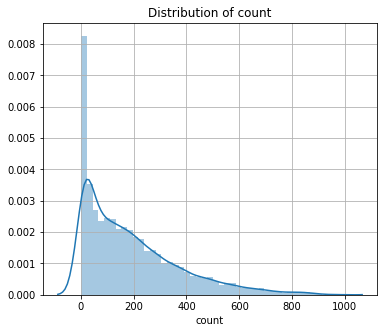

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(6,5)
sns.distplot(train['count'])
ax.set(xlabel='count', title='Distribution of count')
ax.grid(b=1)

In [19]:
# np.std(df.col) != df.col.std()
np.std(train['count'],ddof=1) == train['count'].std()

True

In [20]:
filterout = np.abs(train['count'] - train['count'].mean()) <= train['count'].std()*3
train_WithoutOutliers = train[filterout]

In [23]:
train_WithoutOutliers['count'].describe()

count    10739.000000
mean       183.003818
std        166.681429
min          1.000000
25%         41.000000
50%        141.000000
75%        276.000000
max        734.000000
Name: count, dtype: float64

过滤掉三个标准差之外的count

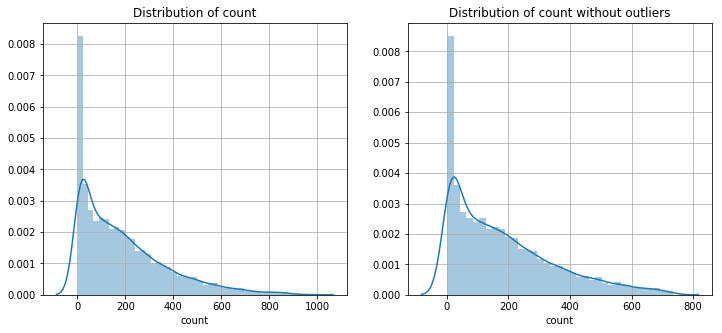

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
sns.distplot(train['count'], ax=ax1)
# sns.distplot(train['count'])
ax1.set(xlabel='count', title='Distribution of count')
ax1.grid(b=1)

sns.distplot(train_WithoutOutliers['count'], ax=ax2)
ax2.set(xlabel='count', title='Distribution of count without outliers')
ax2.grid(b=1)

对count进行对数变换，以减少偏度。 防止训练模型时overfit

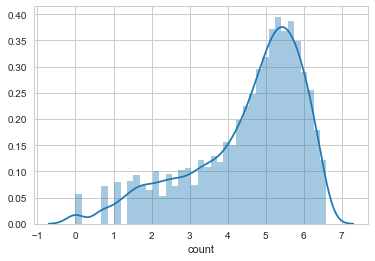

In [79]:
yLabels = train_WithoutOutliers['count']
yLabels_log = np.log(yLabels)
sns.distplot(yLabels_log)

合并test和train data， 方便对其他数值型数据进行处理

In [32]:
test = pd.read_csv('test.csv')

In [34]:
bike_data = pd.concat([train_WithoutOutliers,test], ignore_index=True)
bike_data.shape

(17232, 12)

为了预测风速，首先将日期打细

In [44]:
bike_data.datetime = bike_data.datetime.astype(np.datetime64)

In [52]:
bike_data['date'] = bike_data.datetime.dt.date
bike_data['hour'] = bike_data.datetime.dt.hour
bike_data['year'] = bike_data.datetime.dt.year
bike_data['month'] = bike_data.datetime.dt.month
bike_data['weekday'] = bike_data.datetime.dt.weekday
bike_data['hour'] = bike_data.datetime.dt.hour
bike_data[:10]

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,month,weekday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0000,0,2011-01-01,0,2011,1,5
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0000,0,2011-01-01,1,2011,1,5
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0000,0,2011-01-01,2,2011,1,5
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0000,0,2011-01-01,3,2011,1,5
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0000,0,2011-01-01,4,2011,1,5
5,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.0032,0,2011-01-01,5,2011,1,5
6,13.635,2.0,2.0,2011-01-01 06:00:00,0,80,0.0,1,9.02,1,0.0000,0,2011-01-01,6,2011,1,5
7,12.880,1.0,3.0,2011-01-01 07:00:00,0,86,2.0,1,8.20,1,0.0000,0,2011-01-01,7,2011,1,5
8,14.395,1.0,8.0,2011-01-01 08:00:00,0,75,7.0,1,9.84,1,0.0000,0,2011-01-01,8,2011,1,5
9,17.425,8.0,14.0,2011-01-01 09:00:00,0,76,6.0,1,13.12,1,0.0000,0,2011-01-01,9,2011,1,5


[Text(0.5,1,u'Distribution of windspeed')]

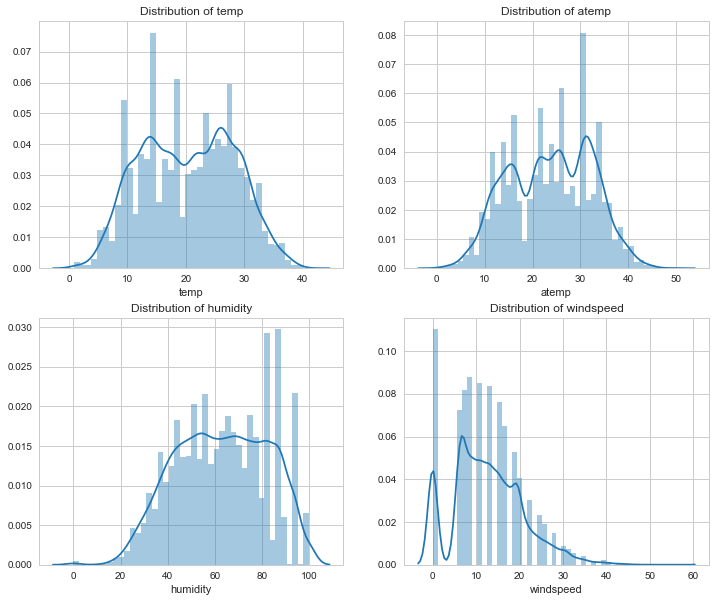

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.distplot(bike_data['temp'],ax=axes[0,0])
sns.distplot(bike_data['atemp'],ax=axes[0,1])
sns.distplot(bike_data['humidity'],ax=axes[1,0])
sns.distplot(bike_data['windspeed'],ax=axes[1,1])

axes[0,0].set(title='Distribution of temp',)
axes[0,1].set(title='Distribution of atemp')
axes[1,0].set(title='Distribution of humidity')
axes[1,1].set(title='Distribution of windspeed')

通过这个分布可以发现一些问题，比如风速为什么0的数据很多，而观察统计描述发现空缺值在1--6之间。  
从这里似乎可以推测，数据本身或许是有缺失值的，但是用0来填充了，但这些风速为0的数据会对预测产生干扰。  
希望使用随机森林根据相同的年份，月份，季节，温度，湿度等几个特征来填充一下风速的缺失值。

In [61]:
bike_data[bike_data.windspeed != 0]['windspeed'].describe()

count    15068.000000
mean        14.556762
std          7.092624
min          6.003200
25%          8.998100
50%         12.998000
75%         19.001200
max         56.996900
Name: windspeed, dtype: float64

In [63]:
from sklearn.ensemble import RandomForestRegressor

1. split train/test data.
2. fit the model using trainning data.
3. predict the outcome using model we got from step 2.

In [64]:
bike_data['windspeed_rfr'] = bike_data['windspeed']

dataWind0 = bike_data[bike_data.windspeed==0]
dataWindNot0 = bike_data[bike_data.windspeed!=0]

In [67]:
rfModel_wind = RandomForestRegressor(n_estimators=1000, random_state=42)
# select features
windColumns = ["season","weather","humidity","month","temp","year","atemp"]

rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed_rfr'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0.loc[:, 'windspeed_rfr'] = wind0Values

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [72]:
bike_data = dataWindNot0.append(dataWind0).reset_index(drop=True)

** 观察一下随机森林处理后的效果**

[Text(0.5,1,u'Distribution of windspeed after filled with predicted value')]

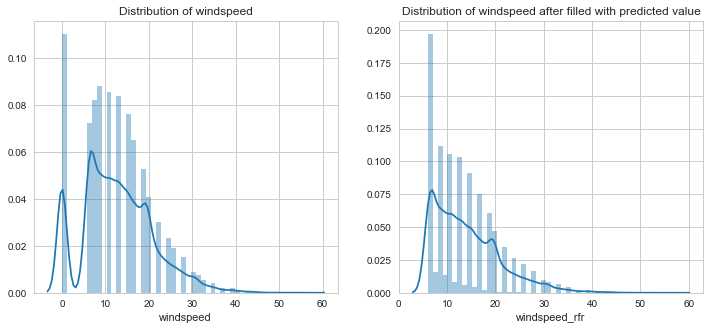

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.distplot(bike_data['windspeed'],ax=axes[0])
sns.distplot(bike_data['windspeed_rfr'],ax=axes[1])
axes[0].set(title='Distribution of windspeed',)
axes[1].set(title='Distribution of windspeed after filled with predicted value')

# 2. 探索性数据分析
利用可视化工具